<a href="https://colab.research.google.com/github/trevorlillywhite/HW-4---NCSU-ST-554---Trevor-Lillywhite/blob/main/HW4_ST_554_Trevor_Lillywhite.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Homework 4 - ST 554

##### Author:   Trevor Lillywhite
##### Due Date: February 10, 2026



---


## Part 1 - Summarizing Student Data Graphically

### Task 0: Bring in Homework 3 Code

In [2]:
import pandas as pd
import numpy as np

#### Task 0.1: Read in the data

In [3]:
url = 'https://www4.stat.ncsu.edu/~online/datasets/StudentData.txt'
df = pd.read_csv(url, delimiter=';')    # Read dataset from URL
df.head()                               # View first few observations

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


#### Task 0.2: Summarize the Data

#### Categorical Variables

##### Create a one-way contingency table

In [4]:
pd.crosstab(index=df['famsize'], columns='counts')

col_0,counts
famsize,
GT3,281
LE3,114


_Interpretation of one-way contingency table:_

The famsize feature describes the size of the student's family. A response of "GT3" means the student has greater than three members of the family, and a response of "LE3" means the student has less than or equal to three members in their family.

The value of 281 for GT3 means that 281 of the students had a family size of greater than 3 family members.

##### Create a two-way contingency table

In [5]:
pd.crosstab(df['famsize'], df['address'])

address,R,U
famsize,,
GT3,68,213
LE3,20,94


_Interpretation of two-way contingency table:_

The first value (located at [0,0]) means that 68 students with a rural address ('R') had a family size greater than 3.

##### Create a three-way contingency table

In [6]:
pd.crosstab(index=df['famsize'],
            columns=[df['address'], df['traveltime']]
            )

address      R               U          
traveltime   1   2   3  4    1   2  3  4
famsize                                 
GT3         30  24  10  4  160  45  7  1
LE3          5  10   4  1   62  28  2  2

_Interpretation of three-way contingency table:_

The first value (located at the intersection of GT3, R, and 1) means that there are 30 students who live at a rural address ('R') with a travel time to school of <15 min (traveltime = 1) and a family size of greater than 3 family members.

##### Create a conditional two-way table.

First, by subsetting the data before creating the table:

In [7]:
df_largefam = df.loc[df['famsize'] == 'GT3']
pd.crosstab(df_largefam['traveltime'], df_largefam['address'])

address,R,U
traveltime,,
1,30,160
2,24,45
3,10,7
4,4,1


_Interpretation:_  

The results are the same as the three-way contingency table from above, but with the first dimension (famsize) collapsed. Here, we see there are 30 students with a rural address and a <15 min travel time (following the condition that all of the students considered have a family size greater than 3 members).

Second, by creating a three-way table and subsetting it:

In [8]:
contingency_threeway = pd.crosstab(index=df['famsize'],
            columns=[df['address'], df['traveltime']]
            )
contingency_threeway.iloc[0,:]

address  traveltime
R        1              30
         2              24
         3              10
         4               4
U        1             160
         2              45
         3               7
         4               1
Name: GT3, dtype: int64

_Interpretation:_  

Although the table is structured differently, we can clearly see the same results as before. For example, on the condition that family sizes are greater than 3, there were 30 students in rural areas with travel time code of 1 (<15 min travel time).

#### Numeric Variables

##### Find measures of center and spread for three variables (including G3)

In [9]:
list_var = ['absences',
            'G1',
            'G3']       # Define three variables of interest
df[list_var].mean()     # Find mean (measure of center)

,0
absences,5.708861
G1,10.908861
G3,10.415190


In [10]:
df[list_var].median()   # Find median (measure of center)

,0
absences,4.0
G1,11.0
G3,11.0


In [11]:
df[list_var].var()      # Find variance (measure of spread)

,0
absences,64.049541
G1,11.017053
G3,20.989616


In [12]:
df[list_var].std()      # Find standard deviation (measure of spread)

,0
absences,8.003096
G1,3.319195
G3,4.581443


In [13]:
df[list_var].quantile(q = [0, 0.25, 0.5, 0.75, 1.0])      # Find quantiles (measures of spread)

,absences,G1,G3
0.00,0.0,3.0,0.0
0.25,0.0,8.0,8.0
0.50,4.0,11.0,11.0
0.75,8.0,13.0,14.0
1.00,75.0,19.0,20.0


Repeat while subsetting the data by some grouping variable (e.g., with `.loc`)

In [14]:
# Subset age >18 before calculating measures of center
df[list_var].loc[(df['age'] > 18)].mean()       # Find mean

,0
absences,9.827586
G1,10.448276
G3,8.758621


In [15]:
# Subset age >18 before calculating measures of center
df[list_var].loc[(df['age'] > 18)].median()       # Find median

,0
absences,5.0
G1,10.0
G3,9.0


In [16]:
# Subset age >18 before calculating measures of spread
df[list_var].loc[(df['age'] > 18)].var()    # Find variance

,0
absences,114.719212
G1,11.256158
G3,22.261084


In [17]:
# Subset age >18 before calculating measures of spread
df[list_var].loc[(df['age'] > 18)].std()    # Find standard deviation

,0
absences,10.710705
G1,3.355020
G3,4.718165


In [18]:
# Subset age >18 before calculating measures of spread
df[list_var].loc[(df['age'] > 18)].quantile(q = [0, 0.25, 0.5, 0.75, 1.0])
        # Find quantiles (specifically, quartiles)

,absences,G1,G3
0.00,0.0,5.0,0.0
0.25,2.0,8.0,8.0
0.50,5.0,10.0,9.0
0.75,15.0,13.0,11.0
1.00,40.0,17.0,18.0


##### Find measures of center and spread across a single grouping variable for three variables (including G3)

In [19]:
# Group by sex before calculating measures of center
df.groupby('sex')[list_var].mean()       # Find mean

,absences,G1,G3
sex,,,
F,6.216346,10.620192,9.966346
M,5.144385,11.229947,10.914439


In [20]:
# Group by sex before calculating measures of center
df.groupby('sex')[list_var].median()       # Find median

,absences,G1,G3
sex,,,
F,4.0,10.0,10.0
M,4.0,11.0,11.0


In [21]:
# Group by sex before calculating measures of spread
df.groupby('sex')[list_var].var()    # Find variance

,absences,G1,G3
sex,,,
F,89.223500,10.449252,21.366012
M,35.769363,11.511356,20.207694


In [22]:
# Group by sex before calculating measures of spread
df.groupby('sex')[list_var].std()    # Find standard deviation

,absences,G1,G3
sex,,,
F,9.445819,3.232530,4.622338
M,5.980749,3.392839,4.495297


In [23]:
# Group by sex before calculating measures of spread
df.groupby('sex')[list_var].quantile(q = [0, 0.25, 0.5, 0.75, 1.0])
        # Find quantiles (specifically, quartiles)

absences    G1    G3
sex                           
F   0.00       0.0   4.0   0.0
    0.25       0.0   8.0   8.0
    0.50       4.0  10.0  10.0
    0.75       8.0  13.0  13.0
    1.00      75.0  19.0  19.0
M   0.00       0.0   3.0   0.0
    0.25       0.0   9.0   9.0
    0.50       4.0  11.0  11.0
    0.75       8.0  14.0  14.0
    1.00      38.0  19.0  20.0

##### Find measures of center and spread across two grouping variables for three variables (including G3)

In [24]:
# Group by sex and parents' cohabitation status
    # before calculating measures of center
df.groupby(['sex', 'Pstatus'])[list_var].mean() # Find mean

absences         G1         G3
sex Pstatus                                
F   A        9.695652   9.826087   9.652174
    T        5.783784  10.718919  10.005405
M   A        7.833333  12.666667  13.166667
    T        4.857988  11.076923  10.674556

In [25]:
# Group by sex and parents' cohabitation status
    # before calculating measures of center
df.groupby(['sex', 'Pstatus'])[list_var].median() # Find median

absences    G1    G3
sex Pstatus                      
F   A             6.0  10.0  11.0
    T             4.0  10.0  10.0
M   A             6.0  12.0  12.0
    T             3.0  11.0  11.0

In [26]:
# Group by sex and parents' cohabitation status
    # before calculating measures of spread
df.groupby(['sex', 'Pstatus'])[list_var].var() # Find variance

absences         G1         G3
sex Pstatus                                  
F   A        238.584980   8.150198  15.600791
    T         70.148649  10.692303  22.157579
M   A         67.794118  11.647059  15.794118
    T         31.884474  11.321429  20.173218

In [27]:
# Group by sex and parents' cohabitation status
    # before calculating measures of spread
df.groupby(['sex', 'Pstatus'])[list_var].std() # Find standard deviation

absences        G1        G3
sex Pstatus                               
F   A        15.446196  2.854855  3.949784
    T         8.375479  3.269909  4.707184
M   A         8.233718  3.412779  3.974181
    T         5.646634  3.364733  4.491461

In [28]:
# Group by sex and parents' cohabitation status
    # before calculating measures of spread
df.groupby(['sex', 'Pstatus'])[list_var].quantile(q = [0, 0.25, 0.5, 0.75, 1.0])
        # Find quantiles (specifically, quartiles)

absences     G1     G3
sex Pstatus                             
F   A       0.00      0.00   4.00   0.00
            0.25      1.00   8.00   8.00
            0.50      6.00  10.00  11.00
            0.75     11.00  12.00  12.50
            1.00     75.00  14.00  15.00
    T       0.00      0.00   5.00   0.00
            0.25      0.00   8.00   8.00
            0.50      4.00  10.00  10.00
            0.75      7.00  13.00  13.00
            1.00     56.00  19.00  19.00
M   A       0.00      0.00   8.00   7.00
            0.25      0.50  10.25  10.00
            0.50      6.00  12.00  12.00
            0.75     11.75  15.75  16.75
            1.00     30.00  18.00  19.00
    T       0.00      0.00   3.00   0.00
            0.25      0.00   9.00   9.00
            0.50      3.00  11.00  11.00
            0.75      8.00  14.00  14.00
            1.00     38.00  19.00  20.00

##### Create a correlation matrix between all of the numeric variables

In [29]:
df[['age', 'absences', 'G1', 'G2', 'G3']].corr()

,age,absences,G1,G2,G3
age,1.000000,0.175230,-0.064081,-0.143474,-0.161579
absences,0.175230,1.000000,-0.031003,-0.031777,0.034247
G1,-0.064081,-0.031003,1.000000,0.852118,0.801468
G2,-0.143474,-0.031777,0.852118,1.000000,0.904868
G3,-0.161579,0.034247,0.801468,0.904868,1.000000




---

### Task 1 - Create Plots for Visualization


#### Categorical Variables

##### Create a histogram, kernel density plot, and boxplot for two numeric variables across one of the categorical variables (that is, create graphs that can compare the distributions across the groups.) For at least one of the kernel density plots across groups, make sure that the graphs are overlayed on the same plot. Add appropriate labels and titles.  

Selected numeric variables: `absences` and `G3`

Selected categorical variable: `Pstatus`

In [30]:
import matplotlib.pyplot as plt
import math

In [31]:
# Create Category version of selected categorical variable
df["Pstatus_cat"] = df.Pstatus.astype('category')
print(df.Pstatus_cat.cat.categories)
df.Pstatus_cat = df.Pstatus_cat.cat.rename_categories(['Apart','Together'])
print(df.Pstatus_cat.cat.categories)

Index(['A', 'T'], dtype='object')
Index(['Apart', 'Together'], dtype='object')


In [32]:
# Create data series for simplicity

df_absences_Pstatus_A = df.loc[df.Pstatus_cat == 'Apart', 'absences']
df_absences_Pstatus_T = df.loc[df.Pstatus_cat == 'Together', 'absences']

df_G3_Pstatus_A = df.loc[df.Pstatus_cat == 'Apart', 'G3']
df_G3_Pstatus_T = df.loc[df.Pstatus_cat == 'Together', 'G3']

##### Histograms

In [33]:
# Determine bin cutoffs for absences
bin_max_absences = max(max(df_absences_Pstatus_A), max(df_absences_Pstatus_T))
bin_structure_absences = range(0, bin_max_absences+10, 10)
list(bin_structure_absences)

[0, 10, 20, 30, 40, 50, 60, 70, 80]

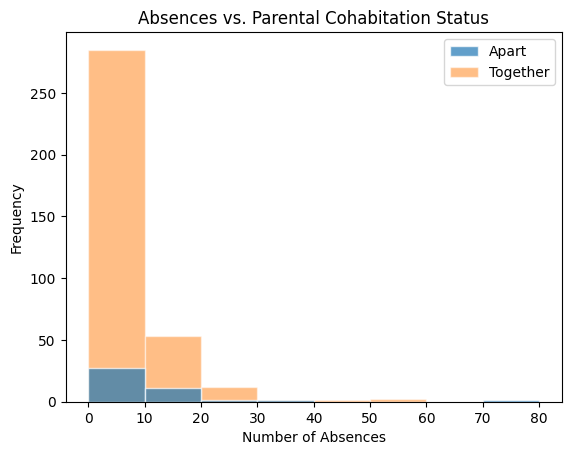

In [34]:
# Plot histogram of absences vs. Pstatus
df_absences_Pstatus_A.plot.hist(bins=bin_structure_absences,
                                edgecolor='white',
                                alpha=0.7,
                                zorder=1,
                                label='Apart')
df_absences_Pstatus_T.plot.hist(bins=bin_structure_absences,
                                edgecolor='white',
                                alpha=0.5,
                                zorder=0,
                                label='Together')
plt.title('Absences vs. Parental Cohabitation Status')
plt.xlabel('Number of Absences')
plt.legend()

_**Interpretation:** Parental cohabitation status does not appear to be a strong indicator of the number of absences. It is difficult to tell because of the imbalanced dataset (many more students in the "Together" category), but the same general trend follows both categories. Most students have few absences, and the number of absences decreases roughly exponentially for subsequent bins._

In [35]:
# Determine bin cutoffs for G3
bin_max_G3 = float(max(max(df_G3_Pstatus_A), max(df_G3_Pstatus_T)))
bin_structure_G3 = np.arange(0.0, bin_max_G3+5, 2.5)
list(bin_structure_G3)

[np.float64(0.0),
 np.float64(2.5),
 np.float64(5.0),
 np.float64(7.5),
 np.float64(10.0),
 np.float64(12.5),
 np.float64(15.0),
 np.float64(17.5),
 np.float64(20.0),
 np.float64(22.5)]

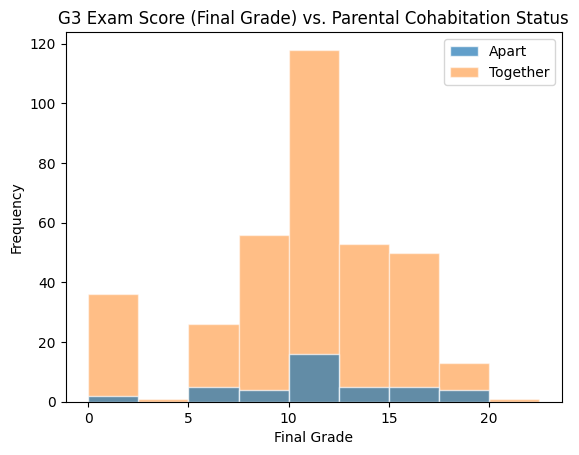

In [36]:
# Plot histogram of G3 vs. Pstatus
df_G3_Pstatus_A.plot.hist(bins=bin_structure_G3,
                                edgecolor='white',
                                alpha=0.7,
                                zorder=1,
                                label='Apart')
df_G3_Pstatus_T.plot.hist(bins=bin_structure_G3,
                                edgecolor='white',
                                alpha=0.5,
                                zorder=0,
                                label='Together')
plt.title('G3 Exam Score (Final Grade) vs. Parental Cohabitation Status')
plt.xlabel('Final Grade')
plt.legend()

_**Interpretation:** Parental cohabitation status does not appear to be a strong indicator of the final grade. It is difficult to tell because of the imbalanced dataset (many more students in the "Together" category), but the same general grade trend follows both categories. Final grades are most frequent in the 10-12.5 bin, and there is a very rough normal distribution around this approximate mean. There is a small bump in the 0-2.5 bin, indicating a number of students may not have taken the exam._

_To better visualize the trend, this histogram will be normalized using the `density=True` argument._

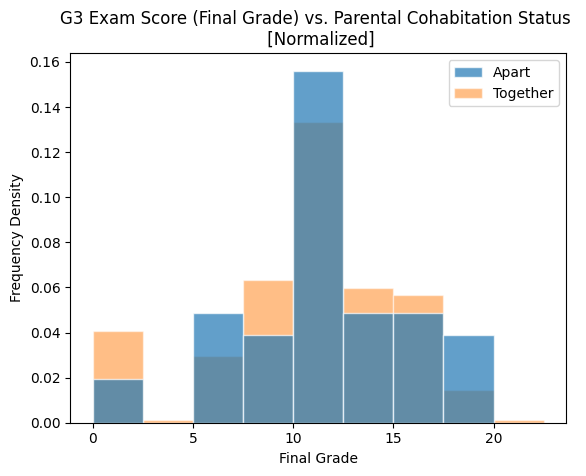

In [37]:
# Plot normalized (density) histogram for same variables
df_G3_Pstatus_A.plot.hist(bins=bin_structure_G3,
                                edgecolor='white',
                                alpha=0.7,
                                zorder=1,
                                label='Apart',
                                density=True)
df_G3_Pstatus_T.plot.hist(bins=bin_structure_G3,
                                edgecolor='white',
                                alpha=0.5,
                                zorder=0,
                                label='Together',
                                density=True)
plt.title('G3 Exam Score (Final Grade) vs. Parental Cohabitation Status \n [Normalized]')
plt.xlabel('Final Grade')
plt.ylabel('Frequency Density')
plt.legend()

_**Interpretation:** This normalized histogram (same data as the previous plot) shows more clearly that there is a similar shape for both parental cohabitation status categories. The "Together" category is slightly more normal but also interestingly has an increased rate of scores in the lowest bin (approximately double)._

##### Kernel Density Plots

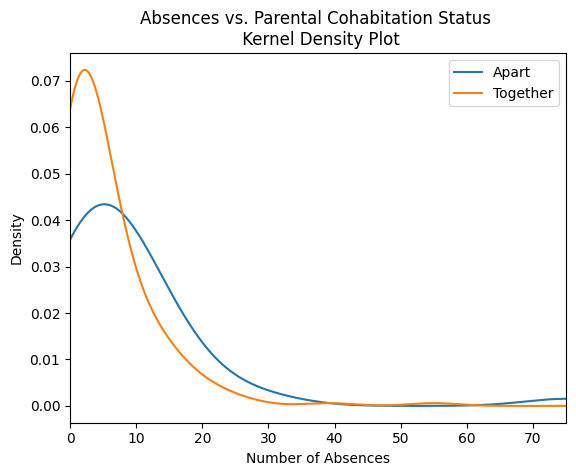

In [38]:
# Plot kernel density function of absences vs. Pstatus
df_absences_Pstatus_A.plot.density(bw_method = 0.5,
                                label='Apart')
df_absences_Pstatus_T.plot.density(bw_method = 0.5,
                                label='Together')
plt.title('Absences vs. Parental Cohabitation Status \n Kernel Density Plot')
plt.xlabel('Number of Absences')
plt.xlim(0,max(max(df_absences_Pstatus_A), max(df_absences_Pstatus_T)))
plt.legend()

_**Interpretation:** As seen with the previous histogram, most absences are in the lowest bins and each successive bin typically has fewer observations. However, this kernel density view helps us better recognize that there is an apparent difference in absences based on parental cohabitation status. It appears that students with cohabitating parents ("Together") are more likely to have very few absences in the school year (fewer than 10)._

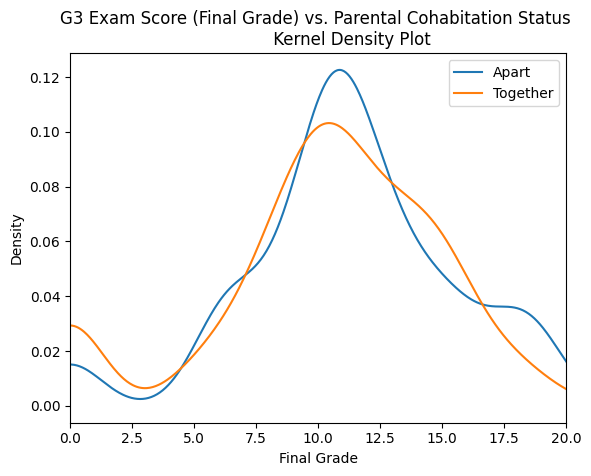

In [41]:
# Plot density kernel function of G3 vs. Pstatus
df_G3_Pstatus_A.plot.density(bw_method = 0.3,
                                label='Apart')
df_G3_Pstatus_T.plot.density(bw_method = 0.3,
                                label='Together')
plt.title('G3 Exam Score (Final Grade) vs. Parental Cohabitation Status \n \
            Kernel Density Plot')
plt.xlabel('Final Grade')
plt.xlim(0, 20)
plt.legend()

_**Interpretation:** As seen with the previous histogram, grades are most frequently distributed for each category in the vicinity of 10-12.5. We can see the same bump, particularly for the "Together" category, in the very lowest range, likely due to a number of students not taking the exam and receiving no credit. The same trends are shown in the normalized histogram plot, but due to uncertainty in the smoothing accuracy (for a given `bw_method` value), the normalized histogram is more interpretable._

_As a bonus, the following plot will explore how the `bw_method` value changes the prominence of features._

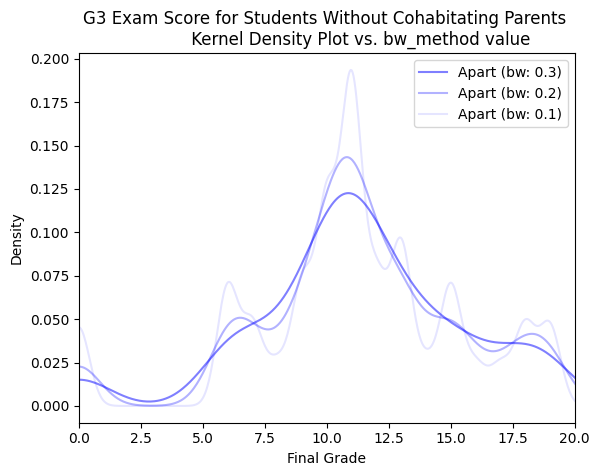

In [53]:
# Explore plot sensitivity to bw_method value
df_G3_Pstatus_A.plot.density(bw_method = 0.3, label='Apart (bw: 0.3)',
                             color = 'blue', alpha=0.5)
df_G3_Pstatus_A.plot.density(bw_method = 0.2, label='Apart (bw: 0.2)',
                             color = 'blue', alpha=0.3)
df_G3_Pstatus_A.plot.density(bw_method = 0.1, label='Apart (bw: 0.1)',
                             color = 'blue', alpha=0.1)
plt.title('G3 Exam Score for Students Without Cohabitating Parents \n \
            Kernel Density Plot vs. bw_method value')
plt.xlabel('Final Grade')
plt.xlim(0, 20)
plt.legend()

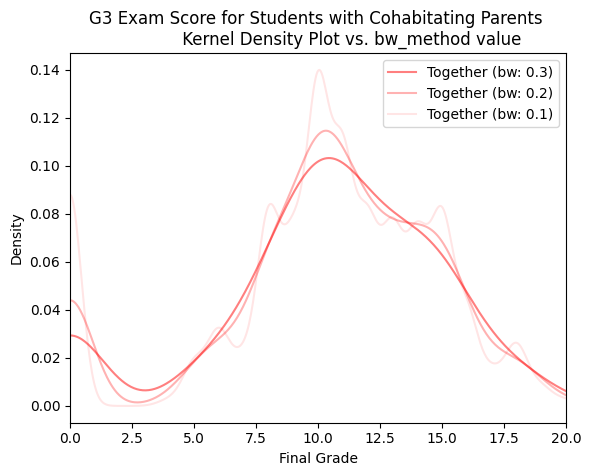

In [52]:
# Explore plot sensitivity to bw_method value
df_G3_Pstatus_T.plot.density(bw_method = 0.3, label='Together (bw: 0.3)',
                             color = 'red', alpha=0.5)
df_G3_Pstatus_T.plot.density(bw_method = 0.2, label='Together (bw: 0.2)',
                             color = 'red', alpha=0.3)
df_G3_Pstatus_T.plot.density(bw_method = 0.1, label='Together (bw: 0.1)',
                             color = 'red', alpha=0.1)
plt.title('G3 Exam Score for Students with Cohabitating Parents \n \
            Kernel Density Plot vs. bw_method value')
plt.xlabel('Final Grade')
plt.xlim(0, 20)
plt.legend()

_**Interpretation:** As expected, features become more prominent with lower bw_method values (less smoothing), but this increases complexity and risk of over-exaggeration in certain areas. In comparision with the histogram plots, it appears that a bw_method value of 0.3 is ideal for viewing overall trends without being overly sensitive to outliers or noise._

##### Box Plots

Text(0.5, 1.0, 'Absences vs. Parental Cohabitation Status')

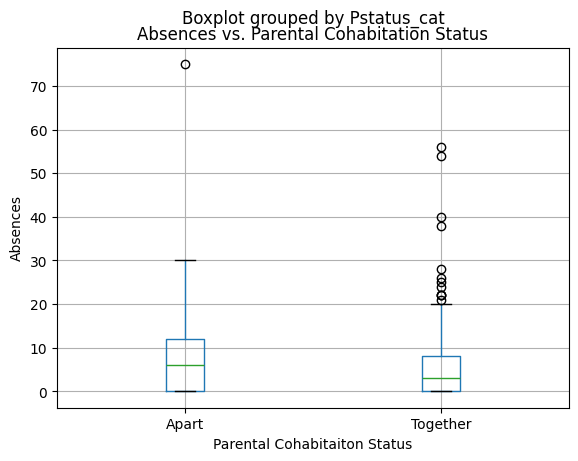

In [69]:
# Create boxplot for absences vs. Pstatus
df.boxplot(column = 'absences', by = 'Pstatus_cat', ).set_ylabel('Absences')
plt.xlabel('Parental Cohabitaiton Status')
plt.title('Absences vs. Parental Cohabitation Status')

_**Interpretation:** In the "Apart" category, we clearly see that there is one single outlier with more than 70 absences. There are several outliers in the "Together" category, but none are as severe and many are grouped just beyond the "whisker" (approximately between 1.5x and 2.5x the interquartile range from Q3). The grouping of absence numbers is tighter for the "Together" category but not by much. The median is also notably lower for the "Together" category. This visualization of data spread better highlights the groupings of outliers than in the previous plots._

Text(0.5, 1.0, 'G3 (Final Exam) Score vs. Parental Cohabitation Status')

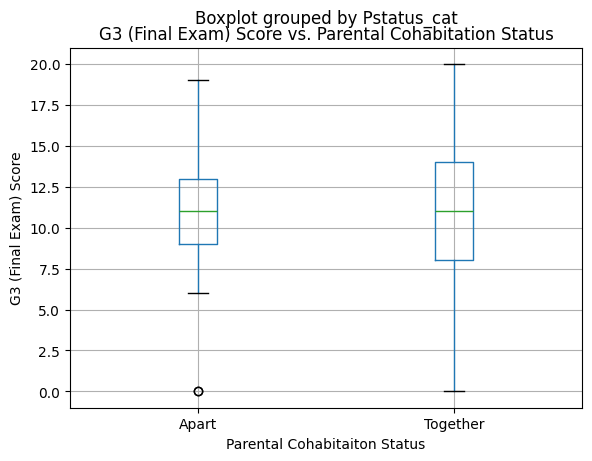

In [70]:
# Create boxplot for G3 vs. Pstatus
df.boxplot(column = 'G3', by = 'Pstatus_cat', ).set_ylabel('G3 (Final Exam) Score')
plt.xlabel('Parental Cohabitaiton Status')
plt.title('G3 (Final Exam) Score vs. Parental Cohabitation Status')

_**Interpretation:** One significant difference between the categories is that the "Apart" category's lower whisker does not extend to the bottom of the range. Accordingly, we see a set of outliers with a score of zero, but it is difficult to see how many observations are grouped together there. The "Together" category had enough students with a very low score that the whisker extends all the way to zero. We can't see any "outliers" on the low end there because they are not significantly lower than the Q1 value. We also see a broader range of values in the Q1-Q1 range, with a very similar median. This matches our observation from the histograms._